<a href="https://colab.research.google.com/github/cira037/jupy-graph/blob/main/Smart_Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTALACIJA

In [107]:
 
%pip install git+https://github.com/jupyterhub/binderhub
!apt install libgraphviz-dev 
!apt install pkg-config
!apt install python-dev
# !apt install d3-graphviz
# !apt install dash

  Cloning https://github.com/jupyterhub/binderhub to /tmp/pip-req-build-cf61n4qn
  Running command git clone -q https://github.com/jupyterhub/binderhub /tmp/pip-req-build-cf61n4qn
     |████████████████████████████████| 153kB 4.3MB/s 
     |████████████████████████████████| 3.6MB 5.8MB/s 
     |████████████████████████████████| 1.8MB 35.5MB/s 
     |████████████████████████████████| 225kB 29.5MB/s 
     |████████████████████████████████| 204kB 47.4MB/s 
     |████████████████████████████████| 163kB 33.5MB/s 
     |████████████████████████████████| 112kB 49.6MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 552kB 39.7MB/s 
     |████████████████████████████████| 2.6MB 49.8MB/s 
  Created wheel for binderhub: filename=binderhub-0.2.0+465.gb35ec4e-cp36-none-any.whl size=1673461 sha256=86e6b6caa7621eaa90e6158b2ade90b773147e4f1de27f324527b756b8d651fc
  Stored in directory: /tmp/pip-ephem

In [106]:
 
%pip install networkx pydot graphviz
%pip install pydotplus
%pip install pygraphviz
%pip install pydot
%pip install dash
%pip install dash-interactive-graphviz

 IMPORTOVANJE

In [ ]:
 
from pprint import pprint as pp
import networkx as nx
from networkx.drawing.nx_pydot import write_dot
import graphviz as gv
from graphviz import Digraph as dg
import pydot as dot
import matplotlib.pyplot as plt
import dash_interactive_graphviz as ding

 IOT SPISAK

In [ ]:
 
 
# WiFi
ruteri = ['r_telekom','r_stan','r_gara','r_cila']
habovi = ['h_stan','h_gara','h_cila']
antene = ['a_A','a_B']
ripiteri = ['ri_gara', 'ri_xiaomi']
 
# SVETLA
sijalice = ['s_stan1', 's_stan2', 's_stan3', 's_gara', 's_cila']
lampe = ['l_stan']
 
# TAJMERI
tajmeri = ['t_gara', 't_cila_TA', 't_cila']
utik = ['u_gara']
 
# KAMERE
kamere = ['k_stan', 'k_gara', 'k_cila']
 
# PREKIDAČI
prekid = ['pr_kocka', 'pr_stan', 'pr_gara']
 
# SENZORI
meteo = ['m_stan', 'mo_stan', 'm_terasa', 'm_gara', 'm_cila1', 'm_cila2'] # 'm_okrugli'
otvor = ['o_stan', 'o_gara', 'o_cila']
vibra = ['v_gara', 'v_cila']
pokret = ['p_gara']
dim = ['d_stan', 'd_cila']
voda = ['vo_stan']
senzori = (*meteo, *otvor, *vibra, *pokret, *dim, *voda)

# PO LOKACIJI
stan = ['r_telekom', 'r_stan', 'h_stan', 'a_A', 'ri_xiaomi', 's_stan1','s_stan2',
        's_stan3', 'l_stan', 'k_stan', 'pr_kocka', 'pr_stan', 'm_stan', 'mo_stan',
        'm_terasa', 'o_stan','d_stan', 'vo_stan']
gara = ['r_gara', 'h_gara' ,'a_B', 'ri_gara', 's_gara', 't_gara', 'u_gara',
        'k_gara', 'pr_gara', 'm_gara', 'o_gara', 'v_gara', 'p_gara']
cila = ['r_cila', 'h_cila', 's_cila', 't_cila_TA', 't_cila', 'k_cila', 
        'm_cila1', 'm_cila2', 'o_cila', 'v_cila', 'd_cila']

PRAVLJENJE GRAFOVA

In [ ]:
# GRAFOVI WIFI
G_ruter = nx.MultiGraph()
G_ruter.add_nodes_from(ruteri, shape="circle", size=10, weight=0.5, color="blue")
 
G_hab = nx.MultiGraph()
G_hab.add_nodes_from(habovi, shape="circle", size=10, weight=0.5, color="blue")
 
G_ant = nx.MultiGraph()
G_ant.add_nodes_from(antene, shape="circle", size=10, weight=0.5, color="blue")
 
G_ripit = nx.MultiGraph()
G_ripit.add_nodes_from(ripiteri, shape="circle", size=10, weight=0.5, color="blue")
 
G_wifi =nx.compose_all([G_ruter, G_hab, G_ant, G_ripit])
 
# GRAFOVI SVETLA
G_sijal = nx.MultiGraph()
G_sijal.add_nodes_from(sijalice, shape="circle", size=10, weight=0.5, color="blue")
 
G_lampe = nx.MultiGraph()
G_lampe.add_nodes_from(lampe, shape="circle", size=10, weight=0.5, color="blue")
 
G_svetlo =nx.compose_all([G_sijal, G_lampe])
 
# GRAFOVI TAJMERA
G_tajmeri = nx.MultiGraph()
G_tajmeri.add_nodes_from(tajmeri, shape="circle", size=10, weight=0.5, color="blue")
 
G_utik = nx.MultiGraph()
G_utik.add_nodes_from(utik, shape="circle", size=10, weight=0.5, color="blue")
 
G_tajm = nx.compose_all([G_tajmeri, G_utik])
 
# GRAFOVI KAMERA
G_kam = nx.MultiGraph()
G_kam.add_nodes_from(kamere, shape="circle", size=10, weight=0.5, color="blue")

# GRAFOVI PREKID
G_prek = nx.MultiGraph()
G_prek.add_nodes_from(prekid, shape="circle", size=10, weight=0.5, color="blue")
 
# GRAFOVI SENZORA
G_meteo = nx.MultiGraph()
G_meteo.add_nodes_from(meteo, shape="circle", size=10, weight=0.5, color="blue")
 
G_otvor = nx.MultiGraph()
G_otvor.add_nodes_from(otvor, shape="triangle", size=12, weight=0.3, color="red")
 
G_vibra = nx.MultiGraph()
G_vibra.add_nodes_from(vibra, shape="circle", size=10, weight=0.4, color="green")
 
G_pokret = nx.MultiGraph()
G_pokret.add_nodes_from(pokret, shape="circle", size=14, weight=0.5, color="yellow")
 
G_voda = nx.MultiGraph()
G_voda.add_nodes_from(voda, shape="circle", size=16, weight=0.6, color="blue")
 
G_senzori = nx.compose_all([G_meteo, G_otvor, G_vibra, G_pokret, G_voda])
 
# SMART HOME GRAF
G_smart = nx.compose_all([G_wifi, G_svetlo, G_tajm, G_kam, G_prek, G_senzori])

SUBGRAFOVI

In [ ]:
# SUBGRAF STAN
Sg_stan = G_smart.subgraph(stan)
pp(list(Sg_stan.nodes(data=True)))

 
# SUBGRAF GARAŽA
Sg_gara = G_smart.subgraph(gara)
 
# SUBGRAF CILA
Sg_cila = G_smart.subgraph(cila)

[('h_stan', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('k_stan', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('pr_kocka', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('vo_stan', {'color': 'blue', 'shape': 'circle', 'size': 16, 'weight': 0.6}),
 ('r_stan', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('m_terasa', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('s_stan1', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('ri_xiaomi', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('s_stan3', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('mo_stan', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('r_telekom', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('pr_stan', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('a_A', {'color': 'blue', 'shape': 'circle', 'si

SPAJANJE NODOVA

In [ ]:
 
# ruteri
G_smart.add_edge('r_telekom','r_stan', color="red", weight=0.8)
G_smart.add_edge('r_stan','h_stan', color="red", weight=0.8)
G_smart.add_edge('r_stan','a_A', color="red", weight=0.8)
G_smart.add_edge('a_A','a_B', color="red", weight=0.8)
G_smart.add_edge('a_B','r_gara', color="red", weight=0.8)
G_smart.add_edge('r_gara','h_gara', color="red", weight=0.8)
G_smart.add_edge('r_cila','h_cila', color="red", weight=0.8)
 
 
# senzori u stanu
G_smart.add_edge('h_stan','m_stan', color="blue", weight=0.6)
G_smart.add_edge('h_stan','o_stan', color="red", weight=0.4)
G_smart.add_edge('h_stan','m_terasa', color="green", weight=0.8)
G_smart.add_edge('h_stan','vo_stan', color="black", weight=0.3)
G_smart.add_edge('h_stan','d_stan', color="black", weight=0.3)

G_smart.add_edge('h_stan','pr_kocka', color="red", weight=0.4)
G_smart.add_edge('h_stan','pr_stan', color="red", weight=0.4)

# ostalo stan
G_smart.add_edge('h_stan','s_stan1', color="green", weight=0.8)
G_smart.add_edge('h_stan','s_stan2', color="green", weight=0.8)
G_smart.add_edge('h_stan','s_stan3', color="green", weight=0.8)
G_smart.add_edge('r_stan','l_stan', color="green", weight=0.8)
G_smart.add_edge('r_stan','k_stan', color="green", weight=0.8)

 
 
# senzori u garaži 
G_smart.add_edge('h_gara','m_gara', color="blue", weight=0.6)
G_smart.add_edge('h_gara','o_gara', color="red", weight=0.4)
G_smart.add_edge('h_gara','v_gara', color="green", weight=0.8)
G_smart.add_edge('h_gara','p_gara', color="green", weight=0.8)
# ostalo garaža
G_smart.add_edge('h_gara','pr_gara', color="blue", weight=0.6)
G_smart.add_edge('r_gara','k_gara', color="red", weight=0.4)
G_smart.add_edge('r_gara','s_gara', color="green", weight=0.8)
G_smart.add_edge('r_gara','t_gara', color="green", weight=0.8)
G_smart.add_edge('r_gara','u_gara', color="green", weight=0.8)
 
 
# senzori kod Cile
G_smart.add_edge('h_cila','m_cila1', color="blue", weight=0.6)
G_smart.add_edge('h_cila','m_cila2', color="red", weight=0.4)
G_smart.add_edge('h_cila','o_cila', color="blue", weight=0.6)
G_smart.add_edge('h_cila','v_cila', color="red", weight=0.4)
G_smart.add_edge('h_cila','d_cila', color="red", weight=0.4)
# ostalo cila
G_smart.add_edge('r_cila','s_cila', color="blue", weight=0.6)
G_smart.add_edge('r_cila','k_cila', color="red", weight=0.4)
G_smart.add_edge('r_cila','t_cila_TA', color="blue", weight=0.6)
G_smart.add_edge('r_cila','t_cila', color="red", weight=0.4)

0





GLEDANJE GRAFOVA

In [ ]:
pp(list(G_meteo.nodes(data=True)))
print(len(G_meteo))
 
pp(list(G_otvor.nodes(data=True)))
print(len(G_otvor))
 
pp(list(G_vibra.nodes(data=True)))
print(len(G_vibra)) 
 
pp(list(G_senzori.nodes(data=True)))
print(len(G_senzori))

[('m_stan', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('mo_stan', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('m_terasa', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('m_gara', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('m_cila1', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('m_cila2', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5})]
6
[('o_stan', {'color': 'red', 'shape': 'triangle', 'size': 12, 'weight': 0.3}),
 ('o_gara', {'color': 'red', 'shape': 'triangle', 'size': 12, 'weight': 0.3}),
 ('o_cila', {'color': 'red', 'shape': 'triangle', 'size': 12, 'weight': 0.3})]
3
[('v_gara', {'color': 'green', 'shape': 'circle', 'size': 10, 'weight': 0.4}),
 ('v_cila', {'color': 'green', 'shape': 'circle', 'size': 10, 'weight': 0.4})]
2
[('m_stan', {'color': 'blue', 'shape': 'circle', 'size': 10, 'weight': 0.5}),
 ('mo_stan', {'color': 'blue', 'shape': 'circle'

In [ ]:
senzori = [*meteo, *otvor, *vibra, *pokret, *voda]
# pp(list(G_smart.nodes(data=True)))
print(len(G_smart), ' nodova')
# pp(list(G_smart.edges(data=True)))
print(len(G_smart.edges()), ' veza')

42  nodova
37  veza


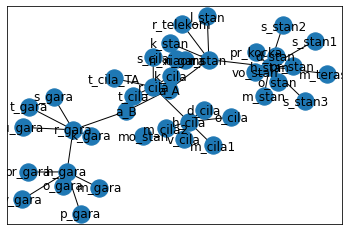

In [ ]:
 
 
#Crtanje sa mathplotlib
 
# nx.draw(G_smart)
 
 
pos = nx.kamada_kawai_layout(G_smart)
nx.draw_networkx(G_smart, pos)
plt.show()
 
# pos1 = dot(G_smart)
# pos1.show(block=False)
# pp(dir(dot))
 
# pos = nx.nx_pydot.graphviz_layout(G_smart)
# nx.draw_networkx(G_smart, pos)
## plt.savefig('networkx_graph.png')

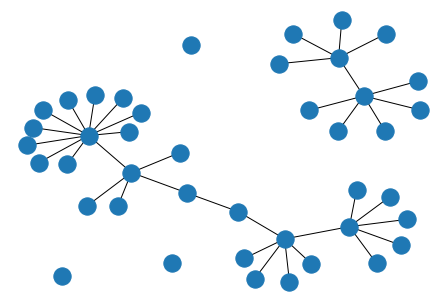

In [ ]:
 
# Crtanje sa graphviz
 
 
pos = nx.nx_agraph.graphviz_layout(G_smart)
# pos = nx.nx_agraph.dot_layout(G_smart)
nx.draw(G_smart, pos=pos)
# write_dot(G_smart, 'file.dot')

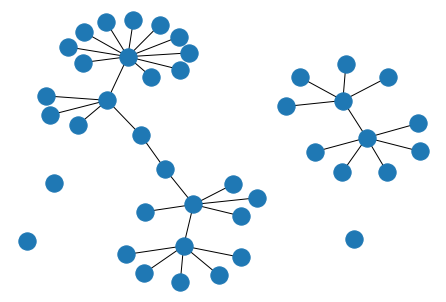

In [ ]:
 
# import pydotplus as pdp
# pp(list(dir(dot)))
 
pos = nx.nx_pydot.pydot_layout(G_smart, prog="neato")
nx.draw(G_smart, pos=pos)
# write_dot(G_smart, 'file.dot')

In [ ]:
pp(list(dir(ding)))

['DashInteractiveGraphviz',
 '_',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_basepath',
 '_component',
 '_css_dist',
 '_current_path',
 '_dash',
 '_filepath',
 '_imports_',
 '_js_dist',
 '_os',
 '_sys',
 '_this_module',
 'f',
 'json',
 'package',
 'package_name']
